In [1]:
# External imports
import numpy as np
import time
import matplotlib.pyplot as plt

# Own imports
from packages.func import func
import tensorflow as tf
from sklearn.model_selection import train_test_split

# # White noise
# mean = 0
# std = 1 
# num_samples = 1000
# samples = np.random.normal(mean, std, size=num_samples)

# t0 = time.time()
# cool_func = func("2 + 3*sin(x/2) + exp(x)^cos(x/3)")
# t1 = time.time()
# print(cool_func.eval(np.pi))
# t2 = time.time()

# print("Time to define: ", t1-t0, "s", sep="")
# print("Time to eval: ", t2-t1, "s", sep="")

# # Sympy
# import numpy as np
# import time
# from sympy import symbols, sin, exp, cos, lambdify

# t0 = time.time()
# x = symbols('x')
# expr = 2 + 3*sin(x/2) + exp(x)**cos(x/3)
# cool_func = lambdify(x, expr)
# t1 = time.time()
# print(cool_func(np.pi))
# t2 = time.time()

# print("Time to define: ", t1-t0, "s", sep="")
# print("Time to eval: ", t2-t1, "s", sep="")


# Defining basis functions:

#basis_functions = ['c', 'x', 'cos', 'exp']

def plot_sample(X):

    num_samples = 100
    start = -10
    end = 10
    step = (end - start)/100
    eval_points = np.arange(start, end, step)

    plt.plot(eval_points,X)
    plt.show()

def generate_sample(f: func) -> (np.array, np.array):

    basis_function = f.get_value()
    y = np.zeros(len(basis_functions))
    for i in range(len(y)):
        if basis_functions[i] == basis_function:
            y[i] = 1

    # mean = np.random.uniform(-0.1, 0.1, 1)
    mean = 0
    std = np.random.uniform(0.1, 0.3, 1)

    num_samples = 100
    start = -10
    end = 10
    step = (end - start)/100
    eval_points = np.arange(start, end, step)

    X = []
    for point in eval_points:
        X.append(f.eval(point))

    noise = np.random.normal(mean, std, size=num_samples)
    X = X + noise

    return np.array(X), np.array(y)

def generate_samples(f_list: list[func], num_samples: int | list[int], shuffle: bool = True) -> (np.array, np.array):
    X_train = []
    y_train = []

    if isinstance(num_samples, int):
        num_samples = [num_samples] * len(f_list)

    for f_ind, f in enumerate(f_list):
        curr_num = num_samples[f_ind]
        for _ in range(curr_num):
            X, y = generate_sample(f)
            X_train.append(X)
            y_train.append(y)

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    if shuffle:
        idx = np.random.permutation(len(X_train))
        return X_train[idx], y_train[idx]

    return X_train, y_train


basis_functions = ['0', 'x', 'x^2', 'x^3', 'sin(x)', 'exp(x)', 'cos(x)']
f_list = []
for f in basis_functions:
    f_list.append(func(f))

X, y = generate_samples(f_list, 10)


def vanilla_neural_network(input_shape, output_num):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(output_num, activation='softmax')
    ])

    return model

model = vanilla_neural_network(np.shape(X[0]), np.shape(y)[1])


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using X_train_new
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, steps_per_epoch=100)



2023-12-03 02:39:42.423554: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 02:39:42.449785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 02:39:42.449811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 02:39:42.450505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 02:39:42.454799: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10


2023-12-03 02:39:43.534560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 02:39:43.555735: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 02:39:43.555864: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

100/100 [==============================] - 1s 852us/step - loss: 14.2587 - accuracy: 0.7089


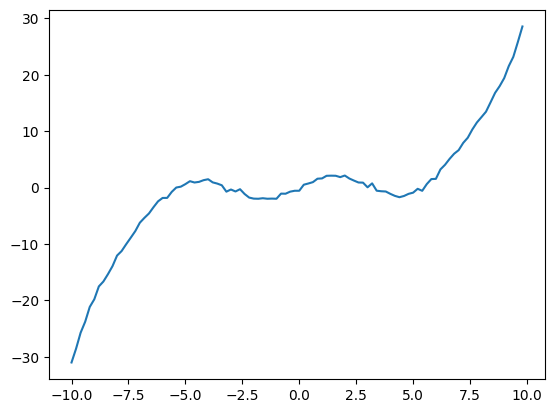

1/1 [==============================] - 0s 47ms/step
[[0.001 0.023 0.064 0.734 0.145 0.028 0.006]
 [0.001 0.019 0.068 0.717 0.169 0.021 0.005]
 [0.001 0.023 0.089 0.745 0.122 0.016 0.004]
 [0.001 0.02  0.082 0.72  0.153 0.02  0.005]
 [0.001 0.021 0.074 0.707 0.174 0.019 0.005]
 [0.001 0.023 0.076 0.735 0.143 0.018 0.005]
 [0.001 0.021 0.074 0.722 0.152 0.024 0.005]
 [0.    0.019 0.08  0.742 0.131 0.022 0.006]
 [0.001 0.024 0.078 0.712 0.163 0.019 0.005]
 [0.001 0.024 0.082 0.72  0.148 0.021 0.005]
 [0.001 0.022 0.084 0.693 0.172 0.022 0.006]
 [0.    0.021 0.072 0.732 0.15  0.018 0.005]
 [0.001 0.023 0.074 0.743 0.138 0.017 0.004]
 [0.001 0.022 0.077 0.736 0.142 0.019 0.004]
 [0.001 0.024 0.083 0.713 0.156 0.019 0.005]
 [0.001 0.022 0.066 0.737 0.148 0.021 0.005]
 [0.001 0.021 0.076 0.72  0.157 0.02  0.005]
 [0.001 0.024 0.081 0.727 0.142 0.021 0.005]
 [0.001 0.023 0.074 0.742 0.134 0.022 0.005]
 [0.    0.022 0.082 0.702 0.17  0.018 0.005]]
Number of rows where max(y_test)[row] == max(y_

In [2]:

# Test the model on X_test
# y_pred = model.predict(X_test)
X_test, y_test = generate_samples([func("(x*0.2)^5 + 2*sin(x)")], 20)
plot_sample(X_test[0])
y_pred = model.predict(X_test)

print(np.around(y_pred, 3))

# Compare mean squared error of y_test and y_pred

count = 0
for i in range(len(y_test)):
    if np.argmax(y_test[i]) == np.argmax(y_pred[i]):
        count += 1

print("Number of rows where max(y_test)[row] == max(y_pred[row]):", count)
print("Number of rows where max(y_test)[row] != max(y_pred[row]):", len(y_test) - count)



In [ ]:
def create_measuremenet_data(X_train: np.array) -> (np.array, np.array):
    num_pts = np.shape(X_train)[1]
    start = -10
    end = 10
    step = (end - start)/num_pts
    eval_points = np.arange(start, end, step) + np.random.uniform(-step/2, step/2, size=num_pts)
    return np.tile(eval_points, (np.shape(X_train)[0], 1)), X_train # X_train is the new "y", eval_pts are X (maybe assume 0 noise?)

In [3]:
operations = ["+", "-", "*", "/", "^", "ch"] # No minus? # TODO: make global basic functions and operations variables; class?
def BFE(basis_functions: list[func], depth: int = 10):
    operations_prob = {key: '[]' for key in operations}
    
    # +
    for basic_fun in basis_functions:
        pass


    # -

    # *

    # /

    # ^

    # ch
        


    return

a = func("3+2")
b = func("x^4")
add = a + b
add.print_tree(add.root)



3+2x^4
